In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
train_dir = "DL_LAB_EXAM/DL_LAB_EXAM/Datasets/Plant_data/Apple/Test"
test_dir = "DL_LAB_EXAM/DL_LAB_EXAM/Datasets/Plant_data/Apple/Test"
val_dir = "DL_LAB_EXAM/DL_LAB_EXAM/Datasets/Plant_data/Apple/Val"

In [4]:
img_size = (64,64)
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 158 images belonging to 4 classes.
Found 348 images belonging to 4 classes.
Found 196 images belonging to 4 classes.


In [8]:
model = Sequential([ Conv2D(32,(2,2),activation = "relu",input_shape =(64,64,3)),
                    MaxPooling2D((2,2)),
                    Conv2D(64,(2,2),activation = "relu"),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(64,activation = "relu"),
                    Dense(4,activation = "softmax")])

C:\Users\Omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = "categorical_crossentropy",metrics =['accuracy'])

In [17]:
history = model.fit(train_gen,validation_data = val_gen,epochs = 10,batch_size = 32)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.2259 - loss: 1.4201 - val_accuracy: 0.2874 - val_loss: 1.3583
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.3940 - loss: 1.3033 - val_accuracy: 0.4253 - val_loss: 1.2297
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.6005 - loss: 1.1176 - val_accuracy: 0.5201 - val_loss: 1.0874
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7362 - loss: 0.8650 - val_accuracy: 0.6293 - val_loss: 0.9508
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8302 - loss: 0.6642 - val_accuracy: 0.6954 - val_loss: 0.8150
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.8567 - loss: 0.5195 - val_accuracy: 0.7040 - val_loss: 0.7560
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.8725 - loss: 0.4008 - val_accuracy: 0.6810 - val_loss: 0.8579
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.8498 - loss: 0.3994 - val_accuracy: 0.6695 - val_loss:

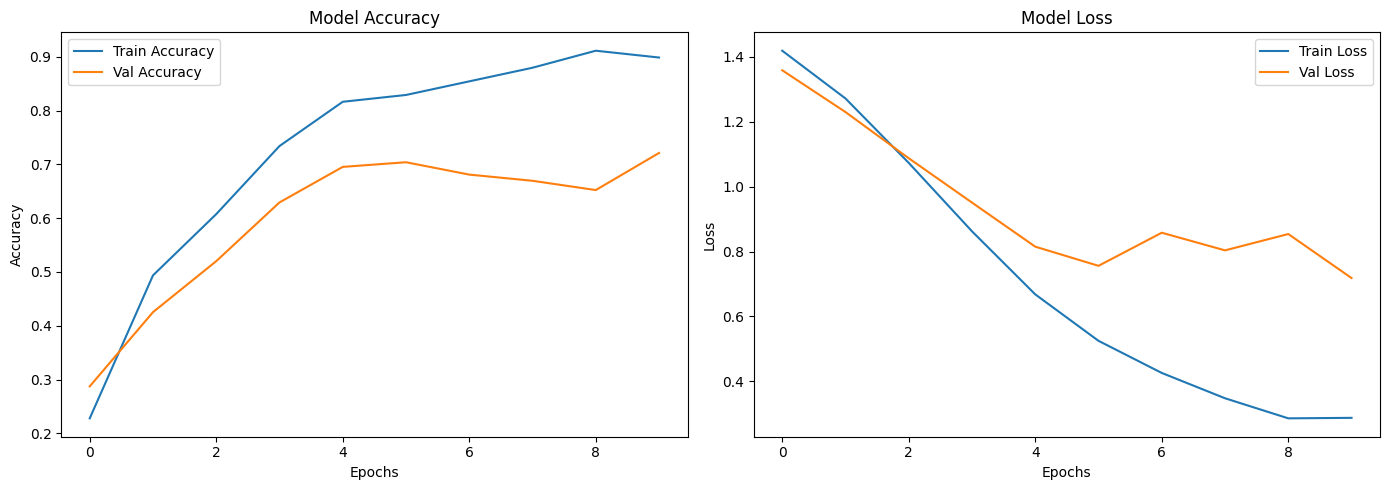

In [19]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
# Get true labels
y_true = test_gen.classes

# Get class labels
class_labels = list(test_gen.class_indices.keys())


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [22]:

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:

                  precision    recall  f1-score   support

      Apple Scab       0.89      0.78      0.83        51
       Black Rot       0.94      0.98      0.96        50
Cedar Apple Rust       0.81      1.00      0.90        44
         Healthy       0.96      0.84      0.90        51

        accuracy                           0.90       196
       macro avg       0.90      0.90      0.90       196
    weighted avg       0.90      0.90      0.90       196



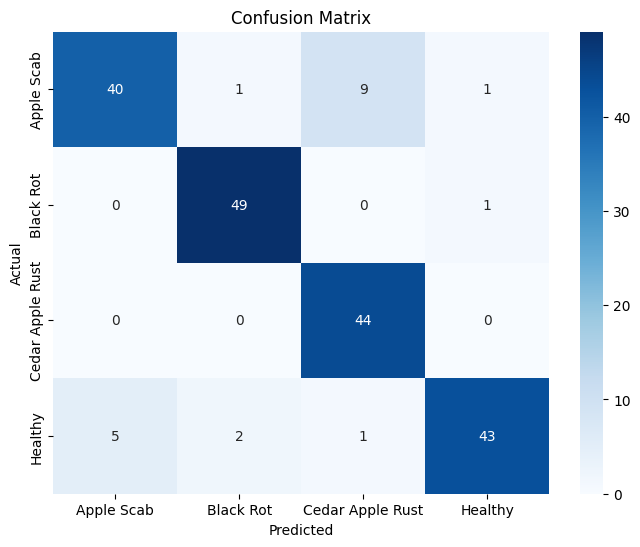

In [25]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()